In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os
from os import listdir
from os.path import isfile, isdir, join

% matplotlib inline

In [5]:
iontype = "Na"

path = "/media/icg-channels/icg-channels-"+iontype+"/"
mod_files = [f for f in listdir(path) if isdir(join(path, f)) and 'git' not in f]
n_mod_files = len(mod_files)

# load the dict file
f = open("/media/icg-channels/icg-channels-"+iontype+".pkl","rb")
data_dict = pickle.load(f)

print("Running for",iontype,"models.")
print("Number of mod files: ",n_mod_files)

Running for Na models.
Number of mod files:  703


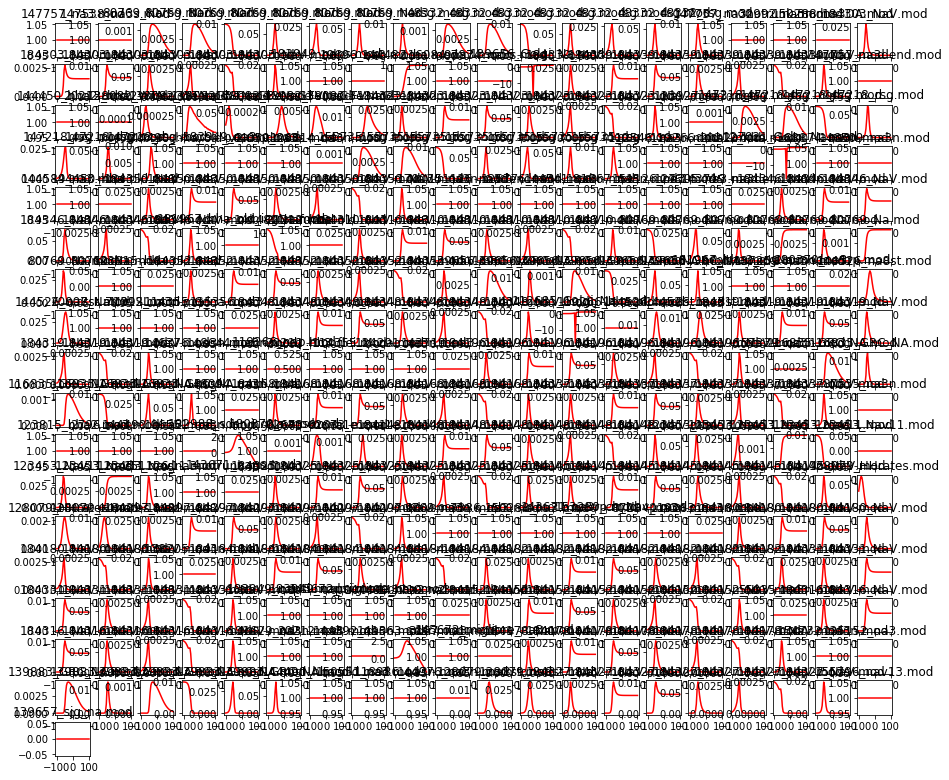

In [14]:
c = 1
plt.figure(figsize=(15,15))

for i in range(n_mod_files):
     
    mod_name = mod_files[i]
    
    rate_path = path+mod_name+"/RATES/"
    rate_files = [f for f in listdir(rate_path) if isfile(join(rate_path, f))]
    if not data_dict[mod_name]['RATES']:
        continue
    
    # loop through all rate files in this mod directory
    for j in range(len(rate_files)):
    
        rfile = rate_files[j]
        fsplit = rfile.split(".")
        varname = fsplit[1]
        curve_type = fsplit[2]
        d = np.loadtxt(rate_path+rfile)
        V = d[:,0]
        rate_data = d[:,1]
    
        if (curve_type == 'inf'):

            if (np.max(rate_data) > 1.1 or np.max(rate_data) < 0.1
                or np.min(rate_data) < 0.0 or np.std(rate_data) < 1e-6):
                plt.subplot(20,20,c)
                plt.plot(V,rate_data,'r')
                plt.title(mod_name)
                c += 1

        #elif (curve_type == 'tau'):
        #    if (np.max(rate_data) < 1e-6 or np.std(rate_data) < 1e-6):
        #        plt.subplot(10,10,c)
        #        plt.plot(V,rate_data,'b')
        #        plt.title(mod_name)
        #        c += 1

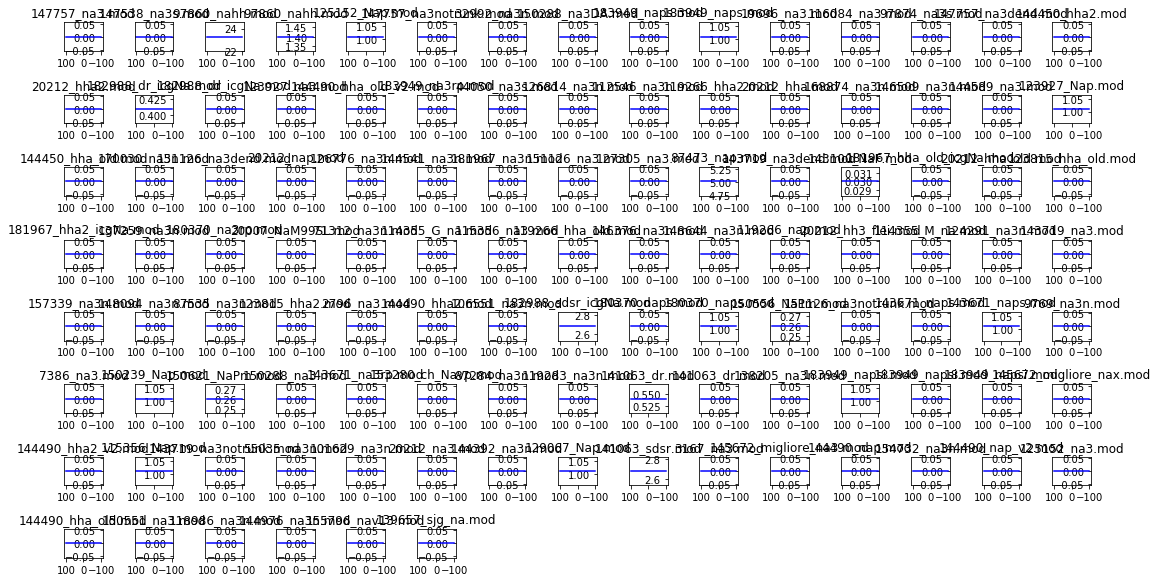

In [18]:
c = 1
plt.figure(figsize=(15,15))

for i in range(n_mod_files):
     
    mod_name = mod_files[i]
    
    rate_path = path+mod_name+"/RATES/"
    rate_files = [f for f in listdir(rate_path) if isfile(join(rate_path, f))]
    if not data_dict[mod_name]['RATES']:
        continue
    
    # loop through all rate files in this mod directory
    for j in range(len(rate_files)):
    
        rfile = rate_files[j]
        fsplit = rfile.split(".")
        varname = fsplit[1]
        curve_type = fsplit[2]
        d = np.loadtxt(rate_path+rfile)
        V = d[:,0]
        rate_data = d[:,1]

        if (curve_type == 'tau'):
            if (np.max(rate_data) < 1e-6 or np.std(rate_data) < 1e-6):
                plt.subplot(15,15,c)
                plt.plot(V,rate_data,'b')
                plt.title(mod_name)
                c += 1
plt.tight_layout()